In [2]:
#Import Necessary Libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier #ANN
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
#reading the data into pandas dataframe

df = pd.read_csv('wdbc.csv')

In [4]:
df.head()

,ID,Diagnosis,radius_1,texture_1,parameter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,parameter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   569 non-null    int64  
 1   Diagnosis            569 non-null    object 
 2   radius_1             569 non-null    float64
 3   texture_1            569 non-null    float64
 4   parameter_1          569 non-null    float64
 5   area_1               569 non-null    float64
 6   smoothness_1         569 non-null    float64
 7   compactness_1        569 non-null    float64
 8   concavity_1          569 non-null    float64
 9   concave points_1     569 non-null    float64
 10  symmetry_1           569 non-null    float64
 11  fractal dimension_1  569 non-null    float64
 12  radius_2             569 non-null    float64
 13  texture_2            569 non-null    float64
 14  parameter_2          569 non-null    float64
 15  area_2               569 non-null    flo

In [6]:
#Diagnosis = pd.get_dummies(df['Diagnosis'],drop_first=True)

In [7]:
#df.drop(['Diagnosis'],axis=1,inplace=True)

In [8]:
#df = pd.concat([df,Diagnosis],axis=1)

In [9]:
#df.head()

In [10]:
# Train Test Split

#x_train, x_test, y_train, y_test = train_test_split(df.drop('M',axis=1),
                                                    #df['M'], test_size=0.20,
                                                    #random_state=101)

In [11]:
train=df.copy()
train['Diagnosis']=train['Diagnosis'].replace({'M':0,'B':1})
train

C:\Users\laure\AppData\Local\Temp\ipykernel_20804\3847166418.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Diagnosis']=train['Diagnosis'].replace({'M':0,'B':1})


,ID,Diagnosis,radius_1,texture_1,parameter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,parameter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
train.head()

,ID,Diagnosis,radius_1,texture_1,parameter_1,area_1,smoothness_1,compactness_1,concavity_1,concave points_1,...,radius_3,texture_3,parameter_3,area_3,smoothness_3,compactness_3,concavity_3,concave points_3,symmetry_3,fractal dimension_3
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Train Test Split

x_train, x_test, y_train, y_test = train_test_split(train.drop('Diagnosis',axis=1),
                                                    train['Diagnosis'], test_size=0.30,
                                                    random_state=101)

In [14]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

398
398
171
171


In [15]:
scaler = StandardScaler()

x_train2=scaler.fit_transform(x_train)
x_test2=scaler.fit_transform(x_test)

In [16]:
#Random Forest 

classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train2, y_train)

RandomForestClassifier()

Random Forest Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



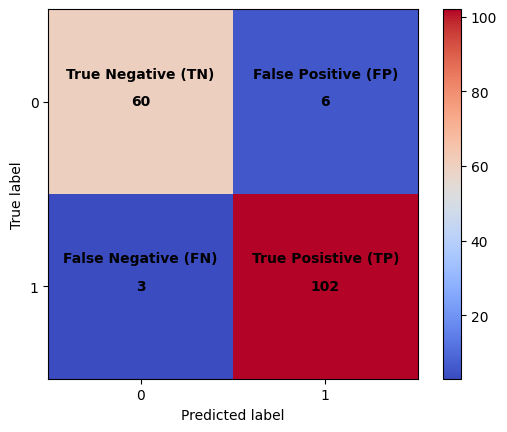

In [17]:
y_pred_rf = classifier_rf.predict(x_test2)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

#Confusion Matrix 
con_matrix_rf = confusion_matrix(y_test, y_pred_rf) 

#Plot confusion matrix 
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix_rf, display_labels=[0, 1])
disp.plot(cmap='coolwarm', text_kw={'color': 'black', 'fontsize': 10, 'fontweight': 'bold'})
                                    
#Add labels directly on top of the numbers
labels = [["True Negative (TN)", "False Positive (FP)"], ["False Negative (FN)", "True Posistive (TP)"]]

for i in range(2): 
    for j in range(2): 
        plt.text(j, i - 0.15, labels[i][j], ha='center', va='center', color='black', fontsize=10, fontweight='bold')

In [18]:
#ANN

classifier_ann = MLPClassifier(max_iter=50, learning_rate_init=0.001, hidden_layer_sizes=(50,50))
classifier_ann.fit(x_train2, y_train)

c:\Users\laure\anaconda3\envs\ProjectEnv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=50)

ANN Accuracy: 0.9708
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



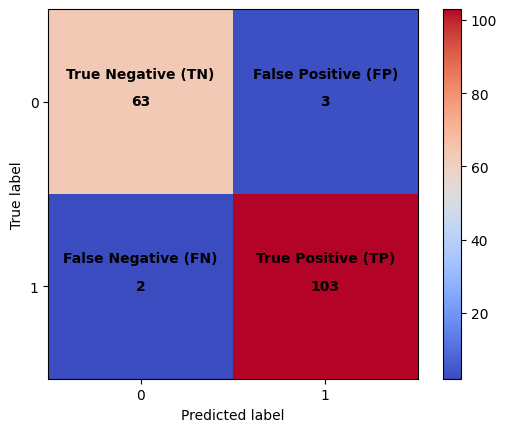

In [19]:
y_pred_ann = classifier_ann.predict(x_test2)
accuracy_ann = accuracy_score(y_test, y_pred_ann)

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(classification_report(y_test, y_pred_ann))


# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_ann, display_labels=[0, 1])
disp.plot(cmap='coolwarm', text_kw={'color': 'black', 'fontsize': 10, 'fontweight': 'bold'})
# Add labels directly on top of the numbers
labels = [["True Negative (TN)", "False Positive (FP)"], ["False Negative (FN)", "True Positive (TP)"]]
for i in range(2):
    for j in range(2):
        plt.text(j, i - 0.15, labels[i][j], ha='center', va='center', color='black', fontsize=10, fontweight='bold')

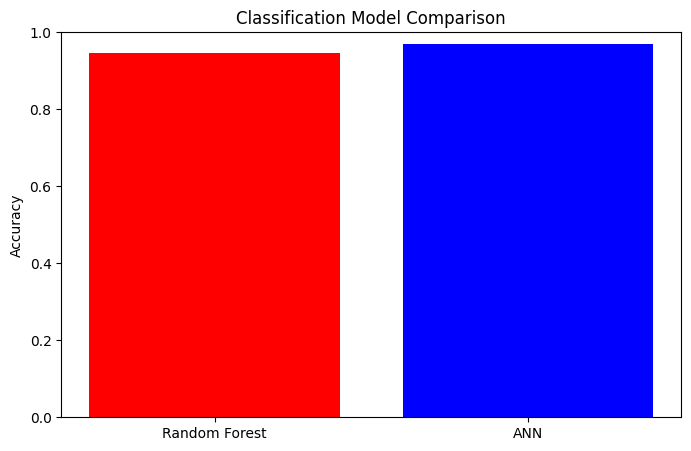

In [20]:
#Plot Classification Model Comparison Results

models_class = ["Random Forest", "ANN"]
accuracy_scores = [accuracy_rf, accuracy_ann]

plt.figure(figsize=(8,5))
plt.bar(models_class, accuracy_scores, color=['red', 'blue'])
plt.ylabel("Accuracy")
plt.title("Classification Model Comparison")
plt.ylim(0, 1)
plt.show()